<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
%pip install seaborn

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [30]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


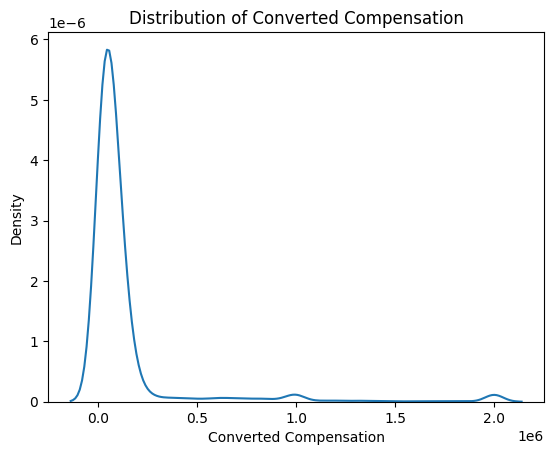

In [31]:
# your code goes here

sns.kdeplot(df['ConvertedComp'].dropna())
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Density')
plt.show()


Plot the histogram for the column `ConvertedComp`.


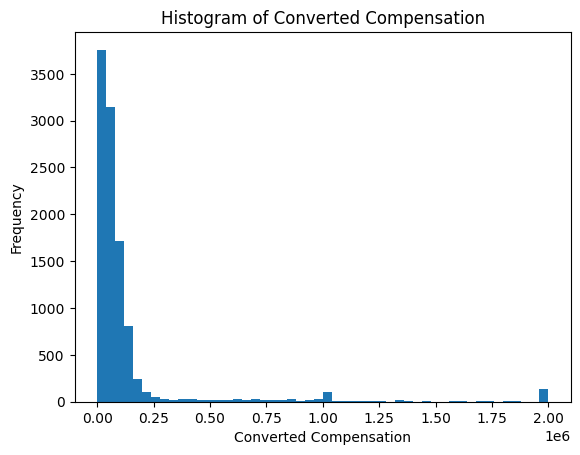

In [32]:
# your code goes here
df['ConvertedComp'].dropna().plot(kind='hist', bins=50, title='Histogram of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.show()


What is the median of the column `ConvertedComp`?


In [33]:
# your code goes here
median_converted_comp = df['ConvertedComp'].median()
print("Median of ConvertedComp:", median_converted_comp)


# Calculate the median age of the survey respondents
median_age = df['Age'].median()
print("Median Age of survey respondents:", median_age)

Median of ConvertedComp: 57745.0
Median Age of survey respondents: 29.0


How many responders identified themselves only as a **Man**?


In [34]:
# your code goes here
num_men = df[df['Gender'] == 'Man'].shape[0]
print("Number of responders identified as a Man:", num_men)


Number of responders identified as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [35]:
# your code goes here
median_converted_comp_women = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print("Median ConvertedComp for women:", median_converted_comp_women)


Median ConvertedComp for women: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [36]:
# your code goes here
age_summary = df['Age'].describe()
print("Five number summary for Age:\n", age_summary)


Five number summary for Age:
 count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


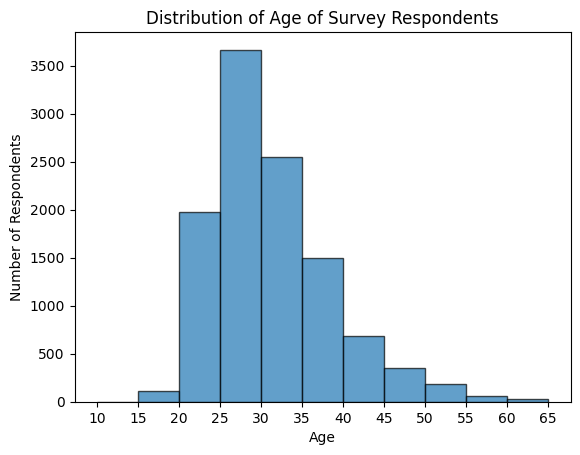

In [37]:
# your code goes here
# Plot a histogram of the Age column
plt.hist(df['Age'].dropna(), bins=range(10, 70, 5), edgecolor='k', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Age of Survey Respondents')
plt.xticks(range(10, 70, 5))
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


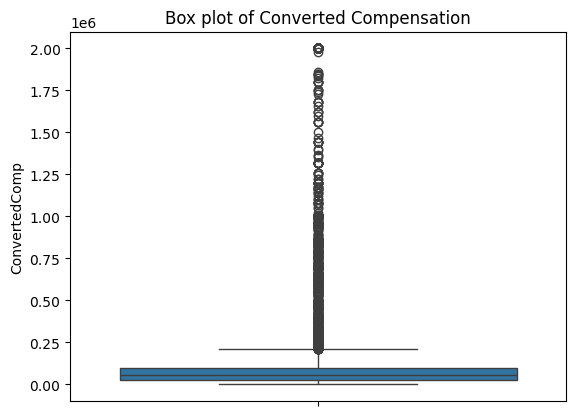

In [38]:
# your code goes here
sns.boxplot(df['ConvertedComp'].dropna())
plt.title('Box plot of Converted Compensation')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [39]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print("Inter Quartile Range for ConvertedComp:", IQR)



Inter Quartile Range for ConvertedComp: 73132.0


Find out the upper and lower bounds.


Lower bound: -82830.0
Upper bound: 209698.0


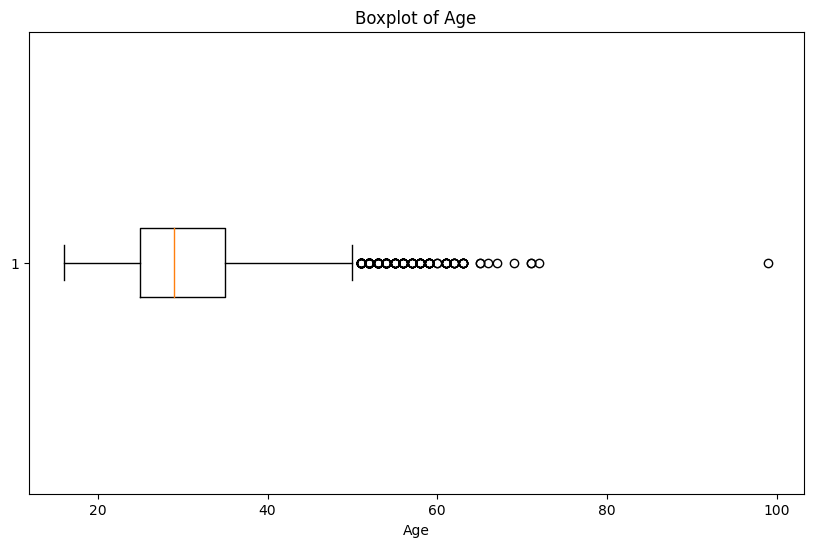

In [40]:
# your code goes here
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# Plot the boxplot for the Age column
plt.figure(figsize=(10, 6))
plt.boxplot(df['Age'].dropna(), vert=False)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

Identify how many outliers are there in the `ConvertedComp` column.


In [41]:
# your code goes here
num_outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)].shape[0]
print("Number of outliers in ConvertedComp:", num_outliers)

# Identify outliers below Q1
outliers_below_Q1 = df[df['Age'] < lower_bound]['Age']
num_outliers_below_Q1 = outliers_below_Q1.count()
print("Number of outliers below Q1:", num_outliers_below_Q1)

Number of outliers in ConvertedComp: 879
Number of outliers below Q1: 0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [43]:
# your code goes here
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
print("Number of rows in the new dataframe:", df_no_outliers.shape[0])

# Calculate the median of the 'ConvertedComp' column after removing outliers
median_converted_comp_no_outliers = df_no_outliers['ConvertedComp'].median()
print("Median ConvertedComp after removing outliers:", median_converted_comp_no_outliers)

# Calculate the mean of the 'ConvertedComp' column after removing outliers
mean_converted_comp_no_outliers = df_no_outliers['ConvertedComp'].mean()
print("Mean ConvertedComp after removing outliers:", mean_converted_comp_no_outliers)


Number of rows in the new dataframe: 9703
Median ConvertedComp after removing outliers: 52704.0
Mean ConvertedComp after removing outliers: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [20]:
# your code goes here
correlation_with_age = df.corr()['Age']
print("Correlation between Age and other numerical columns:\n", correlation_with_age)

# Identify columns with negative correlation with Age
negative_correlation_columns = age_correlation[age_correlation < 0]
print("Columns with negative correlation with Age:\n", negative_correlation_columns)



<ipython-input-20-b764f7b19ffd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_age = df.corr()['Age']


Correlation between Age and other numerical columns:
 Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
